# 5章 サポートベクトルマシン(SVM)

**サポートベクトルマシン**(SVM)は、線形/非線形分類、回帰だけでなく、外れ値検出さえできる非常に強力で柔軟な機械学習モデルである。機械学習でもっとも人気のあるモデルのひとつであり、機械学習に関心を持つ人なら、使いこなせなければならない。SVMは複雑ながら中小規模のデータセットの分類に特に適している。

この章は、SVMの基本理念、使い方、動作の仕組みを説明する。

## 5.1 線形SVM分類器

SVMの基本的な考え方は、図を使うと説明しやすい。次図は、4章の終わりの方で紹介したirisデータセットの一部を示している。このふたつのクラスは、明らかに直線で簡単に分割できる(**線形分割可能**、lineary separableである)。左のグラフは、考え得る3種類の線形分類器の決定境界を表している。破線の決定境界を持つモデルは非常に性能が低く、クラスを正しく分割することさえできない。ほかのふたつは、この訓練セットに対しては完璧に機能するが、決定境界がインスタンスに近いため、新しいインスタンスに対しても同じような性能を発揮することはできないだろう。それに対し、右側のグラフの実践は、SVM分類器は、クラスの間にできる限り太い道(2本の平行な破線で表されている)を通すものだと考えることができる。これを**マージンの大きい分類**と呼ぶ。

「道から外れた」訓練インスタンスを増やしても、決定境界に影響は及ばないことに注意しよう。決定境界は、道の際にあるインスタンスによって決まる(サポートされる)。このようなインスタンスのことを**サポートベクトル**(support vector)と呼ぶ。

In [2]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

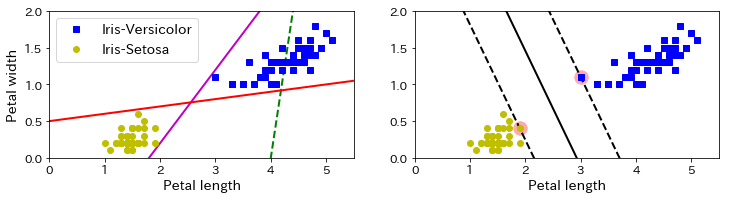

In [6]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

[-2, 2, -2, 2]

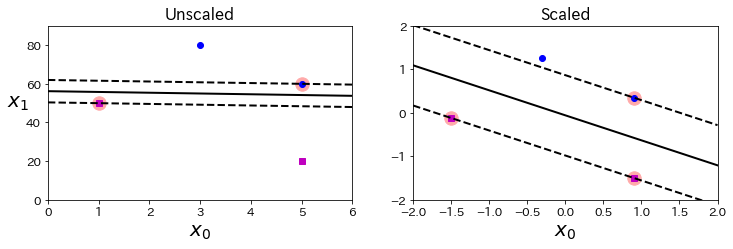

In [7]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

この図からも分かるように、SVMは特徴量のスケールの影響を受けやすい。左側のグラフでは、縦方向のスケールが横方向のスケールよりもかなり大きいので、可能な道のなかでもっとも太いものはほとんど真横に向かうものになっている。特徴量をスケーリング(たとえば、scikit-learnのStandardScalerで)したとの決定境界(右側のグラフ)は、はるかによい感じに見える。

## 5.1.1 ソフトマージン分類

すべてのインスタンスが道に引っかからず、正しい側にいることを厳密に要求する場合、それを**ハードマージン分類**(hard margine classification)と呼ぶ。ハードマージン分類には、データが線形分割できるときでなければ使えず、外れ値に敏感になり過ぎるというふたつの大きな問題点がある。次図は、irisデータセットに1個の外れ値を追加したものを示している。左側のグラフは、ハードマージンを見つけられないもの、右側のグラフは外れ値のない決定境界とはまったく異なり、おそらく同じようには汎化できないものである。

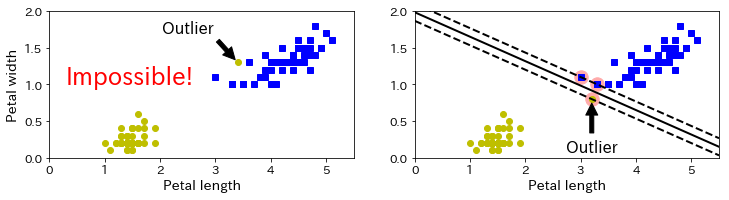

In [9]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

これらの問題を避けるために、もっと柔軟性の高いモデルを使った方がよい。目標は、未知のできる限り太くすることと、**マージン違反**(margin violation=道のなかや間違った側に入ってしまうインスタンス)を減らすこととの間でバランスを取ることだ。これを**ソフトマージン分類**と呼ぶ。

scikit-learnのSVMクラス群では、cハイパーパラメータでこのバランスを調整できる。cが小さければ小さいほど道は太くなるが、マージン違反も増える。次図は、線形分割できないデータセットに対して訓練したふたつのソフトマージンSVM分類器の決定境界とマージンを示している。左側のグラフは、cとして大きな値を使った分類器で、マージン違反は少ないが、マージンが狭くなっている。右側のグラフは、cとして小さな値を使った分類器で、マージンはかなり広いが、道に入り込んでいるインスタンスがかなり多い。しかし、第2の分類器の方が予測誤差は小さい。それは、ほとんどのマージン違反が実際には決定境界の正しい側に分類されるからである。

次のscikit-learnコードは、irisデータセットをロードし、特徴量をスケーリングし、バージニカ種を検出する線形SVMモデルを訓練する(C=1、すぐあとで説明するhinge loss関数を指定したLinearSVCを使う)。

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [12]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # 花弁の長さ、花弁の幅
y = (iris["target"] == 2).astype(np.float64) # バージニカ種

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

いつもと同じように、このモデルを使えば予測をすることができる。

In [13]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [20]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [21]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

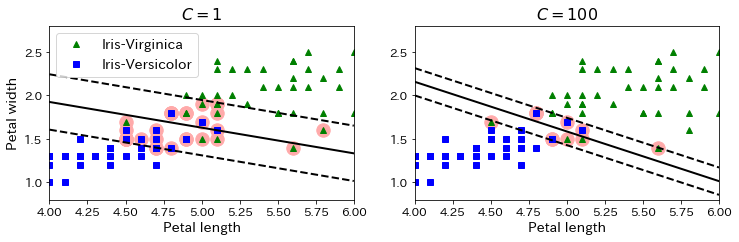

In [22]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

SVC(kernel="linear", C=1)を使ってSVCクラスを使うこともできないわけではないが、特に訓練セットが大きいときにはかなり遅くなるので、おすすめできない。SGDClassifier(loss="hinge", alpha=1/(m\*C))というコードを描いてSGDClassifierを使う方法もある。これは、線形SVM分類器の訓練のために、通常の確率的勾配降下法(4章参照)を適用するものだ。これは、LinearSVCクラスほど速く収束しないが、メモリに収まりきらない巨大なデータセットを扱うとき(コア外訓練)やオンライン分類タスクで役立つ。

## 5.2 非線形SVM分類器

線形SVM分類器は効率的で多くの条件で驚くほどすばらしく機能するが、多くのデータセットは線形分割などとてもできない。このような非線形データセットを処理するためのアプローチのひとつは、多項式特徴量(4章参照)のように特徴量を追加するというものだ。実際、これで線形分割可能なデータセットが得られる場合がある。次図の左側のグラフを見てみよう。これは、特徴量がひとつ(名前は$x_1$)の単純なデータセットを表しているが、この単純なデータセットは線形分割不能である。しかし、$x_2 = (x_1)^2$という第2特徴量を追加して得られた2次元データセットは、完全に線形分割可能だ。

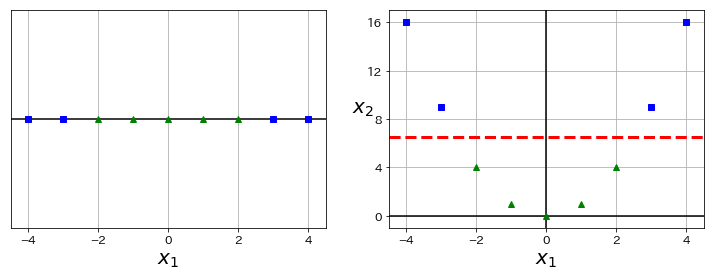

In [23]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

scikit-learnを使ってこの考え方を実装するには、PolynomialFeatures変換器(4章「4.3多項式回帰」参照)とそのあとにStandardScaler、LinearSVCを組み込んだPipelineを作ればよい。これをmoonsデータセットでテストしてみよう。

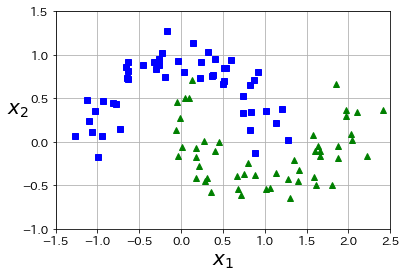

In [25]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [26]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

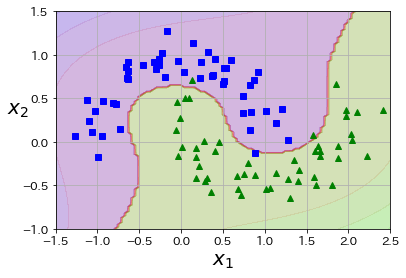

In [27]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## 5.2.1 多項式カーネル

多項式特徴量を追加するのは実装が単純であり、あらゆる種類の機械学習アルゴリズム(SVMに限らず)ですばらしく機能するが、次数が低いと非常に複雑なデータセットを処理できず、次数が高いと特徴量が膨大な数になってモデルが遅くなりすぎる。

しかし、SVMを使う場合は、**カーネルトリック**(kernel trick、すぐあとで説明する)というほとんど奇跡的なテクニックを使うことができる。これを使うと、実際に特徴量を追加せずにまるで多くの多項式特徴量を追加したかのような結果が得られる。実際に特徴量を追加するわけではないので、特徴量数の組合せ爆発も生じない。このトリックは、SVCクラスによって実装される。moonsデータセットでテストしてみよう。

In [28]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

このコードは、3次元多項式カーネルでSVM分類器を訓練する。次図の左側のグラフは、この分類器を表している。右側のグラフには、10次元多項式カーネルを使った別のSVM分類器を示している。当然ながら、モデルは過学習を起こしており、過学習している場合は、多項回帰モデルの次数を下げなければならない。逆に、モデルが過小適合しているなら、多項回帰モデルの次数を上げることになる。ハイパーパラメータのcoef0で、高次多項式モデルと低次多項式モデルからどの程度の影響を認めるかを調節する。

In [29]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

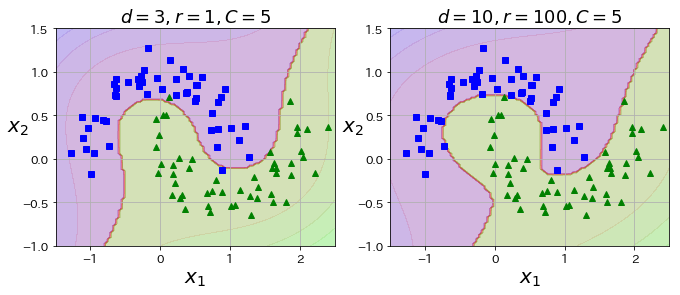

In [30]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.show()

## 5.2.2 類似性特徴量の追加

非線形問題に対処するためにもひとつのテクニックとしては、個々のインスタンスが特定の**ランドマーク**(land mark)にどの程度近いかを測定する類似性関数(similarity function)で計算された値を特徴量として追加するというものがある。たとえば、先ほど取り上げた1次元データセットを使い、$x_1 = -2$、$x_1 = 1$のふたつのランドマークを追加してみよう(次図の左側のグラフ)。次に、$\gamma = 0.3$のガウス**放射基底関数**(Radial Basis Function: RBF、式5-1)になるように類似性関数を定義する。
$$
    \phi_{\gamma}(\pmb{x}, \pmb{l}) = \exp{(-\gamma \| \pmb{x} - \pmb{l} \|^2)} \tag{5-1}
$$
これは、0(ランドマークからかなり離れている)から1(ランドマークそのもの)までのベル型の関数である。これで新しい特徴量を計算する準備が整った。たとえば、$x_1 = -1$のインスタンスを見てみよう。これは第1のランドマークからは1、第2のランドマークからは2の距離にある。そこで、新特徴量は、$x_2 = \exp\,(-0.3 \times 1^2) \approx 0.74$、$x_3 = \exp\,(-0.3 \times 2^2) \approx 0.30$となる。次図の右側のグラフは、変換後のデータセット(もとの特徴量を取り除いたもの)を示している。ご覧のように、これは線形分割可能になっている。

ランドマークはどのようにして選択すればよいのだろうか。もっとも簡単なアプローチは、データセットの個々のインスタンスの位置にランドマークを作ることだ。そうすると、多くの次元が作られ、変換された訓練セットが線形分割可能になる可能性が広がる。欠点は、この方法だと$n$個の特徴量を持つ$m$個のインスタンスによる訓練セットが$m$個の特徴量を持つ$m$個のインスタンスによる訓練セットになってしまう(もとの特徴量を捨てた場合)ことだ。訓練セットが非常に大きい場合、同じように特徴量数も多くなってしまう。

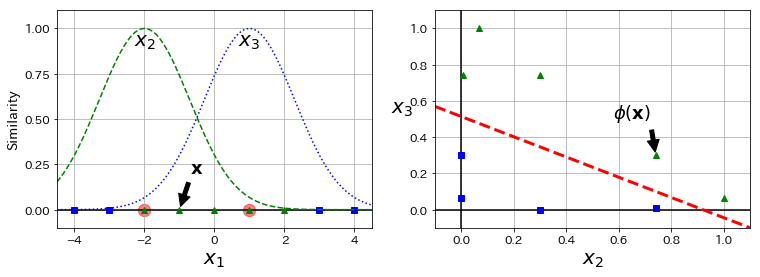

In [31]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.subplots_adjust(right=1)
plt.show()

## 5.2.3 ガウスRBFカーネル

多項式特徴量の方式と同様に、類似特徴量の方式はどの機械学習アルゴリズムでも使えるが、特に訓練セットが大きい場合には、すべての追加特徴量を計算していると、計算量という面でコストが高くなってしまう場合がある。しかし、SVMでは、ここでもカーネルトリックが威力を発揮する。実際に類似特徴量を追加しなくても、多数の類似性特徴量を追加したのと同じ結果が得られるのである。SVCクラスでガウスRBFカーネルを試してみよう。

In [32]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

このモデルは、次図の左下に示してある。ほかのグラフは、ハイパーパラメータのgamma($\gamma$)とCの値を変えて訓練したモデルである。gammaを増やすと、ベル型の曲線が狭くなり(前図の左側のグラフを参照)、その結果、各インスタンスに影響を受ける範囲が小さくなる。決定境界は不規則になり、各インスタンスの周囲でくねくねと曲がる。逆に、gammaを小さくすると、ベル型の曲線の幅が広くなり、各インスタンスの影響を受ける範囲が広がり、決定境界は滑らかになる。つまり、$\gamma$は正則化パラメータと同じように機能する。モデルが過学習しているときには$\gamma$を小さくし、過小適合しているときには$\gamma$を大きくするとよい(同じことがCハイパーパラメータにも当てはまる)。

カーネルはほかにもあるが、RBFカーネルと比べてごくまれにしか使われない。たとえば、特定のデータ構造に専門特化したカーネルがある。テキストやDNAシーケンスの分類では、文字列カーネル(string kernel)が使われることがある(たとえば、**String Subsequence Kernel**や**レーベンシュタイン距離**: Levenshtein distanceに基づくカーネル)。

In [33]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [34]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

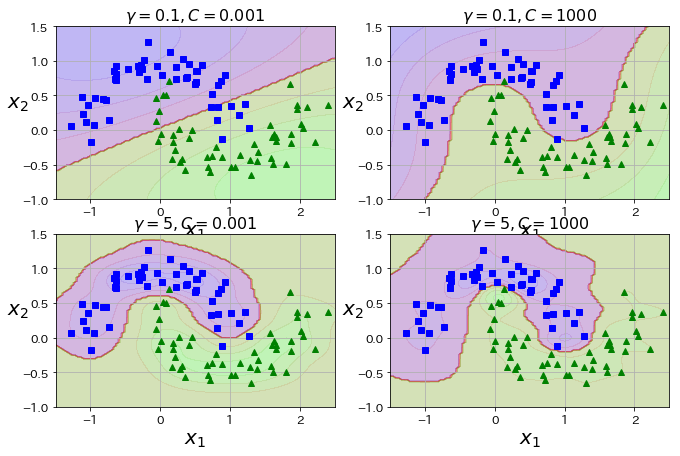

In [35]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

## 5.2.4 計算量

LinearSVCクラスは、線形SVMのために最適化されたアルゴリズム( http://goo.gl/R635CH )を実装するliblinearライブラリを基礎としている。このクラスはカーネルトリックをサポートしていないが、訓練インスタンス数と特徴量に対して線形にスケーリングする。このクラスによる訓練の計算量は、おおよそ$O(m \times n)$になる。

精度を非常に高くしなければならない場合には、アルゴリズムの実行にかかる時間は長くなる。精度は、許容誤差ハイパーパラメータ$\epsilon$(scikit-learnではtolと呼ばれている)によって変えられる。ほとんどの分類タスクでは、デフォルトの許容誤差でよいだろう。

SVCクラスは、カーネルトリックをサポートするアルゴリズム( http://goo.gl/a8HkE3 )を実装するlibsvmライブラリを基礎としている。訓練の計算量は、通常$O(m^2 \times n)$と$O(m^3 \times n)$の間になる。残念ながら、これは訓練インスタンスの数が非常に多いと(たとえば、数十万個)、とてつもなく遅くなるということだ。このアルゴリズムは、複雑だが中小規模の訓練セットには向いている。また、特に**疎な特徴量**(各インスタンスが0以外の値を持つ特徴量をほとんど持っていない)では、特徴量数に対するスケーラビリティは良好である。その場合、アルゴリズムは、各インスタンスが持つ0以外の特徴量の数の平均に対してほぼ線形にスケーリングする。

## 5.3 SVM回帰

すでに述べたように、SVMアルゴリズムは柔軟性が高い。線形、非線形分類をサポートするだけでなく、線形、非線形回帰もサポートする。ポイントは、目的を逆にすることだ。マージン違反を減らしながらふたつのクラスの間にもっとも太い道を通すのではなく、SVM回帰はマージン違反を減らしながら道のなかに入るインスタンスができる限り多くなるようにする(この場合のマージン違反は、道に入って**いない**ことである)。道の太さは、ハイパーパラメータ$\epsilon$によって調整される。図5-10は、無作為な線形データに対して訓練したふたつの線形SVM回帰モデルを示している。片方はマージンが大きく($\epsilon = 1.5$)、もう片方はマージンが小さい($\epsilon = 0.5$)。

マージンに入る訓練インスタンスを増やしても、モデルの予測には影響はない。そのようなことかあら、このモデルは、**$\epsilon$不感**($\epsilon$-insensitive)だと言われている。

scikit-learnのLinearSVRクラスを使えば、線形SVM回帰を行うことができる。次のコードは、図5-10の左側のグラフが表すグラフが表すモデルを作る(まず、訓練データをスケーリングして、中央に移動しなければならない)。

In [36]:
from sklearn.svm import LinearSVR

In [45]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [46]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [47]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

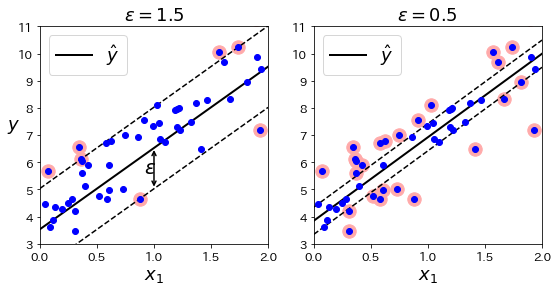

In [48]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

線形回帰には、カーネル化されたSVMモデルを使えばよい。たとえば、図5-11は、無作為な二次回帰訓練セットに対する二次多項式カーネルを使ったSVM回帰を示している。左側のグラフはほとんど正規化されていない(つまりCの値が大きい)が、右側のグラフはかなり正規化されている(つまりCの値が小さい)。

次のコードは、scikit-learnのSVRクラス(カーネルトリックをサポートする)を使って、図5-11の左側のモデルを作る。SVRクラスはSVCクラスの回帰版と言うべきもので、同じようにLinearSVRクラスはLinearSVCクラスの回帰版である。LinearSVRクラスは訓練セットに対して線形にスケーリングする(LinearSVCクラスと同様に)が、SVRクラスは訓練セットが大きくなるとそれ以上に非常に遅くなる(SVCクラスと同様に)。

In [38]:
from sklearn.svm import SVR

In [49]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [50]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

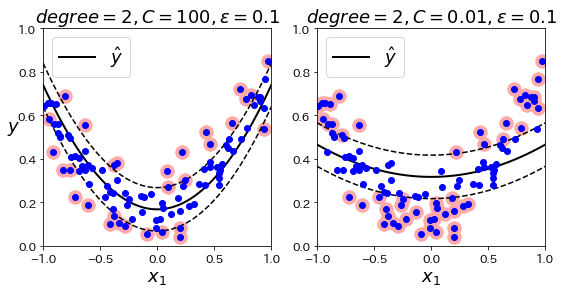

In [52]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

## 5.4 水面下で行われていること

この節では、線形SVM分類器から順に、SVMがどのように予測を行い、訓練アルゴリズムがどのような仕組みになっているのかを説明する。機械学習の勉強を始めたばかりの方は、ここを読み飛ばして演習問題に進んでかまわない。SVMの理解を深めたくなったときにここにもどってくればよい。

まず、記法についてひと言触れておきたい。4章では、すべてのモデルパラメータを$\theta$というひとつのベクトルにまとめる方法を使っていた。バイアス項は$\theta_0$、入力特徴量の重みは$\theta_1$から$\theta_n$とし、すべてのインスタンスにバイアスの$x_0 = 1$を加えていた。しかし、この章では、SVMを扱うときに便利な(そして一般的な)別の記法を使う。つまり、バイアス項は$b$と呼び、特徴量の重みベクトルは$\pmb{w}$と呼ぶ。そして、入力特徴量ベクトルにはバイアスを加算しない。

## 5.4.1 決定関数と予測

SVM分類器モデルは、新しいインスタンス$\pmb{x}$のクラスを予測するとき、単純に決定関数の$\pmb{w}^{\rm T} \cdot \pmb{x} + b = w_1 x_1 + \cdots + w_n x_n + b$を計算する。結果が正なら予測されるクラス$\hat{y}$は陽性クラス(1)、そうでなければ陰性クラス(0)になる。式5-2をみていただきたい。
$$
    \hat{y} =
    \begin{cases}
        0 & {\rm if}\, \pmb{w}^{\rm T} \cdot \pmb{x} + b \lt 0 \\
        1 & {\rm if}\, \pmb{w}^{\rm T} \cdot \pmb{x} + b \geq 0
    \end{cases} \tag{5-2}
$$
図5-12は、図5-4の右側のグラフのモデルに対応する決定関数を表している。このデータセットはふたつの特徴量(花弁の幅と花弁の長さ)を持つので、2次元空間になっている。決定境界は、決定関数が0になる点の集合、つまりふたつの平面が交わるところであり、直線である(太い実線で示してある)。

破線は、決定関数が1か-1に等しくなる点を表している。これらは決定境界と並行で、等距離に離れている。これが決定境界のまわりのマージンを形成する。線形SVM分類器の訓練とは、マージン違反を避ける(ハードマージン)か減らす(ソフトマージン)一方で、このマージンができる限り太くなるような$\pmb{w}$と$b$の値を見つけることである。

In [53]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

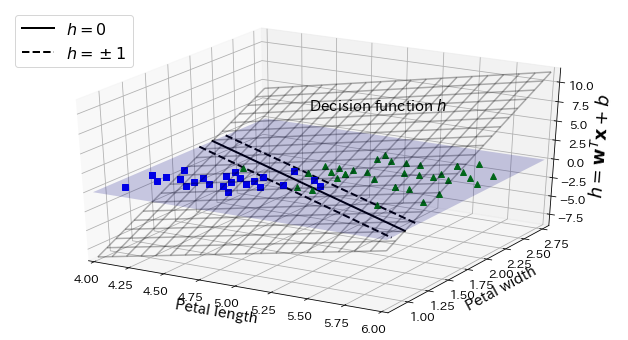

In [54]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=15)
    ax.set_xlabel(r"Petal length", fontsize=15)
    ax.set_ylabel(r"Petal width", fontsize=15)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])
plt.show()

## 5.4.2 訓練の目標

決定関数の傾斜について考えてみよう。そこは、重みのベクトルのノルム、$\|w\|$に等しい。この傾斜を2で割ると、決定境界から決定関数が±1になる点までの距離は2倍になる。つまり、傾斜を2で割ると、マージンは2倍になる。おそらく、これは図5-13のように2次元で見た方がわかりやすいだろう。重みベクトル$\pmb{w}$が小さければ小さいほど、マージンは大きくなる。

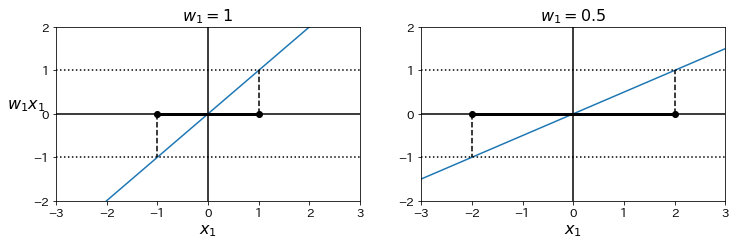

In [55]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plot_2D_decision_function(1, 0)
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show()

そこで、大きなマージンを得るために、$\|w\|$を最小にしたい。しかし、マージン違反を避けたいなら(ハードマージン)、決定関数は、すべての陽性の訓練インスタンスに対して1よりも大きく、すべての陰性の訓練インスタンに対して-1よりも小さくなければならない。陰性インスタンス($y^{(i)} = 0$) なら $t^{(i)} = -1$、陽性インスタンス($y^{(i)} = 1$) なら $t^{(i)} = 1$と定義するなら、この制約は、すべてのインスタンスで$t^{(i)}(\pmb{w}^{\rm T} \cdot \pmb{x}^{(i)} + b) \geq 1$と表現できる。

そこで、ハードマージン線形SVM分類器の目標は、式5-3のような**制約つき最適化**(constrained optimization)問題として表現できる。
$$
\begin{eqnarray}
    {\rm minimize\,} && \frac{1}{2} \pmb{w}^{\rm T} \cdot \pmb{w} \\
    {\rm subject\,to\,} && t^{(i)}(\pmb{w}^{\rm T} \cdot \pmb{x}^{(i)} + b) \geq 1
        {\rm \,\,for\,\,} i=1,2,\dots,m
\end{eqnarray} \tag{5-3}
$$
ソフトマージンの目標を得るには、個々のインスタンスについて、**スラック変数**(slack variable)$\zeta^{(i)} \geq 0$を導入する必要がある。$\zeta^{(i)}$は、$i$番目のインスタンスにどの程度のマージン違反を認めるかである。私たちは、マージン違反を減らすためにスラック変数をできる限り小さくしつつ、マージンを大きくするために$\frac{1}{2}\pmb{w}^{\rm T}\cdot\pmb{w}$をできる限り小さくすうというふたつの矛盾した目標を抱えている。Cハイパーパラメータの出番だ。Cハイパーパラメータを使えば、ふたつの目標の間のトレードオフを調整できる。すると、式5-4のような制約つき最適化問題が得られる。
$$
\begin{eqnarray}
    {\rm minimize\,} && \frac{1}{2} \pmb{w}^{\rm T} \cdot \pmb{w} 
        + C\sum_{i=1}^m \zeta^{(i)} \\
    {\rm subject\,to\,} && t^{(i)}(\pmb{w}^{\rm T} \cdot \pmb{x}^{(i)} + b)
        \geq 1 - \zeta^{(i)} {\rm \,\,and\,\,} \zeta^{(i)} \geq 0
        {\rm \,\,for\,\,} i=1,2,\dots,m
\end{eqnarray} \tag{5-4}
$$

## 5.4.3 二次計画法

ハードマージン問題とソフトマージン問題は、どちらも線形制約のもとで凸関数を最適化するという問題である。この種の問題は、**二次計画**(Quadratic Programming: QP)問題と呼ばれる。本書では扱えないさまざまなテクニックを使ってQP問題を解決するできあいのソルバーはいくつも存在している。式5-5は、この問題の一般形である。